In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
from sklearn import datasets

In [3]:
housing = datasets.load_boston()
type(housing)

sklearn.utils.Bunch

In [4]:
# sklearn.utils.Bunch : dictionary 객체로 만들어 놓은 것.!

In [5]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
housing['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
X_data = housing.data  ##문제

In [8]:
y_data = housing.target ##답(집값)

In [9]:
y_data[:3]

array([24. , 21.6, 34.7])

In [10]:
X_data.shape

(506, 13)

In [11]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [13]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 13) (455,)
(51, 13) (51,)


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
## 레이어를 순서대로 쌓을 수 있도록 객체를 생성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear')) 
## 회귀일때, 마지막 출력층의 활성화함수

## 쌓은 것으로 모델 셋팅을 하세요.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [18]:
## 레이어를 순서대로 쌓을 수 있도록 객체를 생성
model2 = Sequential()
model2.add(Dense(128, activation='sigmoid', input_dim=13))
model2.add(Dense(64, activation='sigmoid'))
model2.add(Dense(32, activation='sigmoid'))
model2.add(Dense(16, activation='sigmoid'))
model2.add(Dense(1, activation='linear')) 
## 회귀일때, 마지막 출력층의 활성화함수

## 쌓은 것으로 모델 셋팅을 하세요.
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 모델에 셋팅한 내용을 요약해서 프린트
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1792      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)
history

Epoch 1/200
15/15 - 0s - loss: 9.3766 - mae: 2.1687 - 15ms/epoch - 994us/step
Epoch 2/200
15/15 - 0s - loss: 9.4266 - mae: 2.1872 - 25ms/epoch - 2ms/step
Epoch 3/200
15/15 - 0s - loss: 8.9770 - mae: 2.1566 - 21ms/epoch - 1ms/step
Epoch 4/200
15/15 - 0s - loss: 9.1589 - mae: 2.1370 - 19ms/epoch - 1ms/step
Epoch 5/200
15/15 - 0s - loss: 9.0319 - mae: 2.1215 - 17ms/epoch - 1ms/step
Epoch 6/200
15/15 - 0s - loss: 8.7324 - mae: 2.1307 - 21ms/epoch - 1ms/step
Epoch 7/200
15/15 - 0s - loss: 8.9352 - mae: 2.0850 - 16ms/epoch - 1ms/step
Epoch 8/200
15/15 - 0s - loss: 8.5806 - mae: 2.0861 - 19ms/epoch - 1ms/step
Epoch 9/200
15/15 - 0s - loss: 8.7695 - mae: 2.0920 - 18ms/epoch - 1ms/step
Epoch 10/200
15/15 - 0s - loss: 8.2954 - mae: 2.0674 - 16ms/epoch - 1ms/step
Epoch 11/200
15/15 - 0s - loss: 8.8769 - mae: 2.1397 - 16ms/epoch - 1ms/step
Epoch 12/200
15/15 - 0s - loss: 8.2272 - mae: 2.0884 - 14ms/epoch - 910us/step
Epoch 13/200
15/15 - 0s - loss: 8.2262 - mae: 2.0453 - 16ms/epoch - 1ms/step
Epoc

In [21]:
history2 = model2.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)
history2

Epoch 1/200
15/15 - 0s - loss: 594.9295 - mae: 22.5793 - 362ms/epoch - 24ms/step
Epoch 2/200
15/15 - 0s - loss: 565.0698 - mae: 21.9167 - 12ms/epoch - 822us/step
Epoch 3/200
15/15 - 0s - loss: 541.5485 - mae: 21.3753 - 15ms/epoch - 1ms/step
Epoch 4/200
15/15 - 0s - loss: 522.3171 - mae: 20.9207 - 16ms/epoch - 1ms/step
Epoch 5/200
15/15 - 0s - loss: 506.1215 - mae: 20.5277 - 16ms/epoch - 1ms/step
Epoch 6/200
15/15 - 0s - loss: 492.0902 - mae: 20.1827 - 17ms/epoch - 1ms/step
Epoch 7/200
15/15 - 0s - loss: 479.9296 - mae: 19.8791 - 17ms/epoch - 1ms/step
Epoch 8/200
15/15 - 0s - loss: 469.3665 - mae: 19.6135 - 13ms/epoch - 865us/step
Epoch 9/200
15/15 - 0s - loss: 460.1622 - mae: 19.3750 - 17ms/epoch - 1ms/step
Epoch 10/200
15/15 - 0s - loss: 451.8086 - mae: 19.1566 - 14ms/epoch - 962us/step
Epoch 11/200
15/15 - 0s - loss: 443.9487 - mae: 18.9555 - 15ms/epoch - 1ms/step
Epoch 12/200
15/15 - 0s - loss: 436.7143 - mae: 18.7625 - 15ms/epoch - 1ms/step
Epoch 13/200
15/15 - 0s - loss: 429.6426 

In [22]:
eval_test = model.evaluate(X_test, y_test)
eval_test

2/2 [==============================] - 0s 2ms/step - loss: 11.3790 - mae: 2.2855


[11.378981590270996, 2.2855162620544434]

In [23]:
eval_test2 = model2.evaluate(X_test, y_test)
eval_test2

2/2 [==============================] - 0s 2ms/step - loss: 79.4358 - mae: 6.5361


[79.4357681274414, 6.53610897064209]

In [24]:
eval_test[0] #loss

11.378981590270996

In [25]:
eval_test[1] #mae

2.2855162620544434

In [26]:
pred_test = model.predict(X_test)
pred_test[:5]

array([[22.332933],
       [11.756989],
       [25.816912],
       [28.42305 ],
       [ 8.471038]], dtype=float32)

In [27]:
pred_test2 = model2.predict(X_test)
pred_test2[:5]

array([[21.913837],
       [21.913841],
       [21.913837],
       [21.913841],
       [21.913841]], dtype=float32)

In [28]:
y_test[:5]

array([23.4,  8.1, 22. , 15. , 10.4])

In [29]:
len(pred_test)

51

In [30]:
pred_test[46:]

array([[19.66075 ],
       [23.128325],
       [17.936287],
       [18.458345],
       [25.088099]], dtype=float32)

In [31]:
y_test[46:]

array([20.1, 22. , 16.7, 18.7, 19.6])

In [32]:
from sklearn.metrics import r2_score

In [33]:
R2 = r2_score(y_test, pred_test)

In [34]:
R2

0.8532516140484321

In [36]:
R22 = r2_score(y_test, pred_test2) #sigmoid
R22

-0.02443883384278367

In [49]:
history

In [50]:
history.model

In [56]:
history.history['mae'][:3]

[2.118427276611328, 2.059671640396118, 2.0962307453155518]

In [57]:
history.history['loss'][:3]

[8.488134384155273, 8.081789016723633, 8.229816436767578]

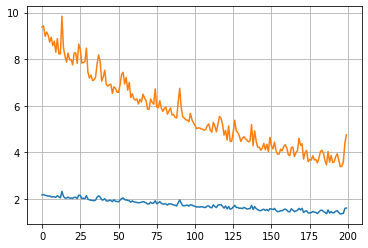

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.grid()
plt.show()

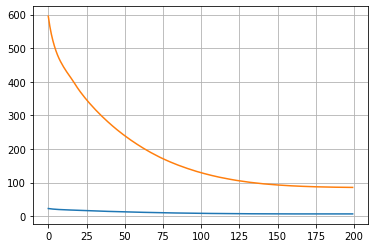

In [38]:
plt.plot(history2.history['mae'])
plt.plot(history2.history['loss'])
plt.grid()
plt.show()

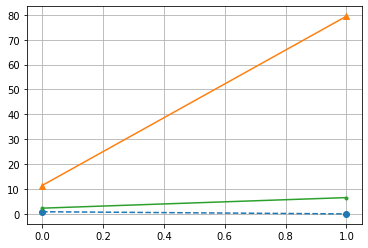

In [48]:
plt.plot([R2, R22], marker='o', linestyle = 'dashed') #R2비교
plt.plot([eval_test[0], eval_test2[0]], marker='^') #loss비교
plt.plot([eval_test[1], eval_test2[1]], marker='.') #mae비교       
plt.grid()
plt.show()